In [1]:
import pandas as pd
import numpy as np
import math
from scipy import special
import matplotlib.pyplot as plt
import statsmodels.stats.weightstats as sm

In [2]:
N_steps = 100
N_steps_orig = 1800 
N_k = 64
T_h = 18000
N_x = 21
N_y = 21

In [3]:
result_loc = "./../../../Server_results/06_01_2021/"
train_loc = "Run_no_zero_flow_no_oscilations_Run_Run_1620834677/"

In [4]:


run_name = "experiment01_06_12_37_50"
q_x = np.loadtxt(f"{result_loc}{run_name}q_x.txt")
q_x = q_x.reshape([-1,N_k,N_steps])
q_y = np.loadtxt(f"{result_loc}{run_name}q_y.txt")
q_y = q_y.reshape([-1,N_k,N_steps])
k_x = np.loadtxt(f"{result_loc}{run_name}k_x.txt")
k_x = k_x.reshape([-1,N_k,N_steps])
k_y = np.loadtxt(f"{result_loc}{run_name}k_y.txt")
k_y = k_y.reshape([-1,N_k,N_steps])
k_xy = np.loadtxt(f"{result_loc}{run_name}k_xy.txt")
k_xy = k_xy.reshape([-1,N_k,N_steps])
p = np.loadtxt(f"{result_loc}{run_name}p.txt")
p = p.reshape([-1,N_k])

In [5]:
q_x.shape

(5, 64, 100)

In [6]:
p.shape

(5, 64)

In [7]:
# df_k_imp = pd.read_csv(f"{result_loc}check_initialq_x.txt",sep='\t',header=None)

In [8]:
def plot_cdf(p,qoi,time_step,epoch):
    P = p[epoch]
    QOI = qoi[epoch,:,time_step]

    index = np.argsort(QOI)
    plt.plot(QOI[index],np.cumsum(P))


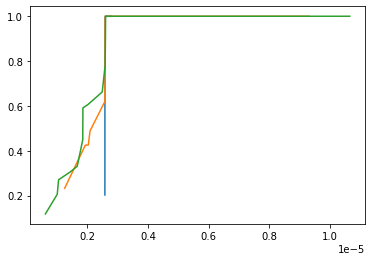

In [26]:
plot_cdf(p,q_y,0,1)
plot_cdf(p,q_y,0,3)
plot_cdf(p,q_y,0,4)
# plot_cdf(p,q_y,0,5)
# plot_cdf(p,q_y,0,6)
# plot_cdf(p,q_y,0,7)

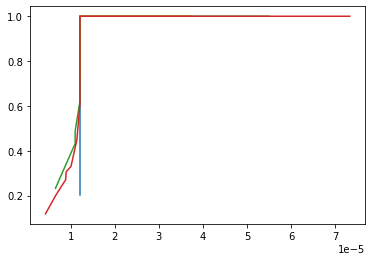

In [28]:
plot_cdf(p,q_x,10,1)
plot_cdf(p,q_x,10,2)
plot_cdf(p,q_x,10,3)
plot_cdf(p,q_x,10,4)
# plot_cdf(p,q_x,0,7)

In [11]:
q_MC_x = np.loadtxt(f"{train_loc}Q_x_5.txt")
q_MC_y = np.loadtxt(f"{train_loc}Q_y_5.txt")


In [12]:
q_MC_x.shape

(100, 1800)

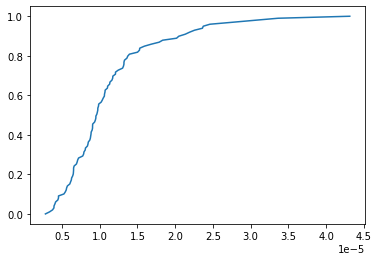

In [13]:
Q_MC = q_MC_x[:,1256]

index_MC = np.argsort(Q_MC)
plt.plot(Q_MC[index_MC],np.linspace(0,1,100))

# Q_MC = q_MC_x[0,0]

# index_MC = np.argsort(Q_MC)
# plt.plot(Q_MC[index_MC],np.linspace(0,1,100))

In [14]:
np.linspace(0,1,101)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [15]:
Q_MC

array([1.36011539e-05, 4.53877672e-06, 1.16193436e-05, 5.71700595e-06,
       9.05269472e-06, 8.84802224e-06, 8.37132739e-06, 9.75010545e-06,
       4.06444502e-06, 7.74796260e-06, 2.80736684e-06, 1.20877164e-05,
       1.68189907e-05, 5.26042798e-06, 3.06179450e-05, 1.01963258e-05,
       3.36301717e-05, 9.62373155e-06, 1.30308144e-05, 1.20905546e-05,
       7.91069686e-06, 2.13265189e-05, 6.53830530e-06, 9.06830965e-06,
       1.13510815e-05, 8.49024072e-06, 8.86954516e-06, 7.01085299e-06,
       9.05002949e-06, 1.13146463e-05, 3.34486007e-06, 6.41542429e-06,
       1.03392135e-05, 6.49741081e-06, 6.13490412e-06, 9.74399979e-06,
       2.36098961e-05, 1.06160596e-05, 1.24496119e-05, 3.94807076e-06,
       9.32076464e-06, 1.52650290e-05, 3.93230516e-06, 1.83393024e-05,
       3.74449467e-06, 7.08095441e-06, 8.11550877e-06, 8.68863316e-06,
       5.43622424e-06, 1.04629361e-05, 1.06961369e-05, 9.68923686e-06,
       8.44549625e-06, 4.54120691e-06, 6.03719993e-06, 1.37077348e-05,
      

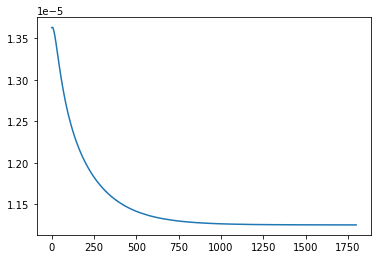

In [16]:
plt.plot(q_MC_x.mean(axis=0))

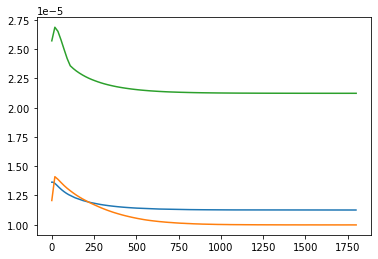

In [17]:
plt.plot(q_MC_x.mean(axis=0))
# plt.plot(np.linspace(0,1800,N_steps),q_x[1,:,:].mean(axis=0))
# plt.plot(np.linspace(0,1800,N_steps),q_x[2,:,:].max(axis=0))
plt.plot(np.linspace(0,1800,N_steps),q_x[2,2,:])
plt.plot(np.linspace(0,1800,N_steps),q_x[4,1,:])

# plt.plot(np.linspace(1,1800,N_steps),np.inner(q_x[2,:,:].T,p[2,:]))

# plt.plot(np.linspace(1,1800,N_steps),np.inner(q_x[2,:,:].T,p[2,:]))
# plt.plot(np.linspace(1,1800,N_steps),np.inner(q_x[3,:,:].T,p[3,:]))
# plt.plot(np.linspace(1,1800,N_steps),np.inner(q_x[4,:,:].T,p[4,:]))

# plt.plot(np.linspace(1,1800,N_steps),q_x[6,0:4,:].mean(axis=0))
# plt.plot(np.linspace(2,1800,N_steps),q_x[7,0:4,:].min(axis=0))
# plt.plot(np.linspace(1,1800,N_steps),q_x[7,0:4,:].max(axis=0))

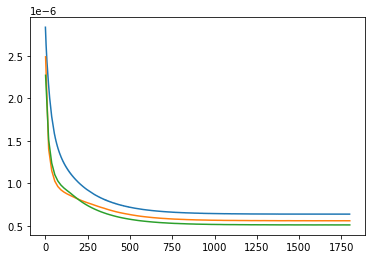

In [74]:
plt.plot(q_MC_y.mean(axis=0))
# plt.plot(np.linspace(1,1800,N_steps),q_y[1,0:4,:].mean(axis=0))
plt.plot(np.linspace(1,1800,N_steps),np.inner(q_y[3,:,:].T,p[3,:]))
plt.plot(np.linspace(1,1800,N_steps),np.inner(q_y[4,:,:].T,p[4,:]))


# plt.plot(np.linspace(1,1800,N_steps),q_y[3,0:4,:].mean(axis=0))
# plt.plot(np.linspace(1,1800,N_steps),q_y[5,0:4,:].mean(axis=0))

In [28]:
q_y[1,:,:]*p[1:2,:]

ValueError: operands could not be broadcast together with shapes (64,100) (1,64) 

In [34]:
np.inner(q_y[1,:,:].T,p[1,:])

array([2.64112368e-06, 1.02010206e-06, 8.51046770e-07, 7.42650772e-07,
       6.71616273e-07, 6.50670853e-07, 6.43452245e-07, 6.42682400e-07,
       6.36146209e-07, 6.29153325e-07, 6.40886850e-07, 6.51543945e-07,
       6.46730259e-07, 6.32070716e-07, 6.18817831e-07, 6.13393321e-07,
       6.15170337e-07, 6.19906543e-07, 6.23566752e-07, 6.23623827e-07,
       6.20897481e-07, 6.16254734e-07, 6.10545963e-07, 6.04520284e-07,
       5.98684961e-07, 5.93429644e-07, 5.88366608e-07, 5.84019355e-07,
       5.79572097e-07, 5.75787629e-07, 5.71887371e-07, 5.68549343e-07,
       5.65593202e-07, 5.62868689e-07, 5.60105276e-07, 5.57454896e-07,
       5.55376672e-07, 5.53035067e-07, 5.51084637e-07, 5.49498601e-07,
       5.47581675e-07, 5.46037265e-07, 5.44551415e-07, 5.43559995e-07,
       5.42224503e-07, 5.41342079e-07, 5.39981807e-07, 5.39021632e-07,
       5.38366304e-07, 5.37054760e-07, 5.36639266e-07, 5.35997155e-07,
       5.35657100e-07, 5.34941028e-07, 5.34082847e-07, 5.33887632e-07,
      

In [52]:
p[4,:]

array([1.18359476e-01, 8.75841555e-02, 6.47567612e-02, 3.49563296e-02,
       2.50328213e-02, 1.18035903e-01, 1.42405813e-01, 1.50321402e-02,
       5.63403047e-02, 1.08136386e-01, 3.62931825e-04, 1.00086776e-02,
       8.09000564e-02, 1.32363305e-01, 7.28260652e-04, 4.99667915e-03,
       6.69889173e-46, 1.15198959e-45, 8.24073777e-46, 1.25921124e-45,
       7.41934181e-46, 1.21493436e-45, 1.19234995e-45, 8.35370808e-46,
       6.80862137e-46, 1.14852799e-45, 6.23200929e-46, 9.67856453e-46,
       9.69500104e-46, 6.98286469e-46, 6.78572132e-46, 6.47518740e-46,
       9.49294101e-46, 6.49811857e-46, 5.49131237e-46, 7.38461475e-46,
       9.48262221e-46, 1.27003225e-45, 6.43080657e-46, 1.03265853e-45,
       1.32271035e-45, 1.08302852e-45, 6.67359423e-46, 7.26376918e-46,
       5.33097760e-46, 1.06616341e-45, 5.53518059e-46, 1.07872673e-45,
       6.19937966e-46, 6.78041350e-46, 6.85494555e-46, 7.28058817e-46,
       8.14710130e-46, 1.32217610e-45, 6.71114208e-46, 9.59043038e-46,
      

In [20]:
k_xy

array([[[-2.85968072e-08, -1.58706232e-08,  3.64258883e-08, ...,
          5.07408031e-08, -1.81676812e-08, -2.05982831e-09],
        [-1.44695112e-08, -8.47270118e-09, -4.65812804e-08, ...,
         -1.43770243e-08, -1.23889241e-08,  3.24555336e-08],
        [ 3.49771067e-08,  1.74889216e-08,  3.49767950e-08, ...,
          8.93291975e-09,  5.75835558e-09, -2.69272036e-08],
        ...,
        [-1.08059437e-08,  2.88443498e-08, -3.27257277e-08, ...,
         -4.44135513e-08,  1.20691843e-08, -1.53231614e-08],
        [ 4.62266996e-08,  2.05698352e-08, -1.05885071e-08, ...,
          4.82858893e-09,  3.97716580e-08, -5.36112601e-08],
        [ 3.80142161e-08, -1.03580618e-08, -2.08020075e-08, ...,
          4.35921887e-09,  4.57002040e-08,  4.19174119e-08]],

       [[ 4.47743622e-04,  7.21622193e-05, -2.26864386e-04, ...,
          7.92494974e-05,  7.91730171e-05,  7.92738798e-05],
        [ 5.21537270e-05,  1.39188769e-04, -1.90947595e-04, ...,
          8.05914172e-05,  7.98810740e